## Decomposing a PV array output time series.

In [19]:
#importing required libraries

import cvxpy as cp
import numpy as np
from numpy import loadtxt
from numpy import savetxt
import matplotlib.pyplot as plt
import math

c = loadtxt('data.npy')
p = np.reshape(c,[2016,1])

N=288     #[(24*60)/5]
T =2016   # 7*24*12 periods (one week)

# Defining Variables

c=cp.Variable((T,1)) # power of the PV output without clouds
s=cp.Variable((T,1)) 
r=cp.Variable((T,1)) # residual errors

# Objective Function 

laplacian = sum((c[i]-c[i+1])**2 for i in range(1,N))+(c[N-1]-c[0])**2
loss_function = laplacian + np.ones(T).T@s  #lambda = 1

#Defining Objective  
objective = cp.Minimize(loss_function)


#  Constraints
constraints = [0<=s, s<=c, p==c-s+r]
constraints = constraints + [(cp.norm(r,1)/T)<=4]
constraints = constraints + [(c[i]==c[i-N]) for i in range(N,T)]

# Problem solving

prob = cp.Problem(objective,constraints)
prob.solve()



# Printing the results 
print('Minimum value of loss function is :',"\n",prob.solve())       

print(' The avg value of power of the PV output without clouds(c) :',"\n",np.mean(c.value))
print('The avg value of shading loss component(s):',"\n",np.mean(s.value ))
print(' The avg value of output power of PV array(p):',"\n ",np.mean(p))
print(' The avg abosulte value of residual error(r):',"\n",np.mean(r.value))
 


Minimum value of loss function is : 
 98131.26530798776
 The avg value of power of the PV output without clouds(c) : 
 529.5165786927685
The avg value of shading loss component(s): 
 4.478869466400749
 The avg value of output power of PV array(p): 
  529.0375009330357
 The avg abosulte value of residual error(r): 
 3.9997917454621557


## Plots for the resulting variables

Text(0, 0.5, 'output power without clouds (c)')

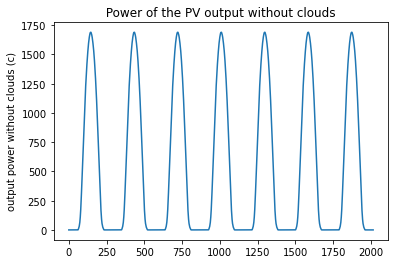

In [15]:
#Power of the PV output without clouds
plt.figure()
plt.plot(c.value)
plt.title(' Power of the PV output without clouds ')
plt.ylabel('output power without clouds (c)')


Text(0, 0.5, 'Shading loss component (s)')

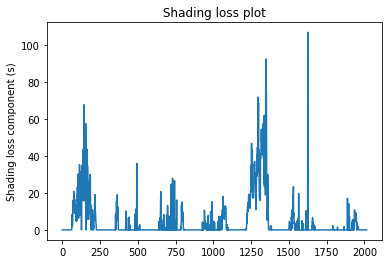

In [16]:
#Shading loss plot
plt.figure()
plt.plot(s.value)
plt.title(' Shading loss plot ')
plt.ylabel('Shading loss component (s)')
 

Text(0, 0.5, 'Residual error')

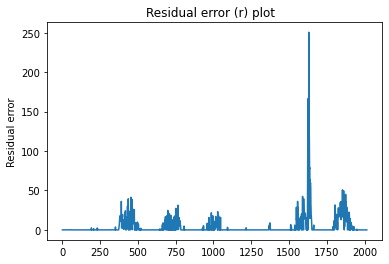

In [17]:
#Residual error plot (r)
plt.figure()
plt.plot(r.value)
plt.title('Residual error (r) plot  ')
plt.ylabel('Residual error')

Text(0, 0.5, 'PV array output')

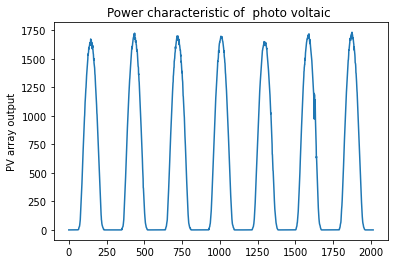

In [18]:
#Power characteristic of  photo voltaic
plt.figure()
plt.plot(p)
plt.title('Power characteristic of  photo voltaic ')
plt.ylabel('PV array output')
